In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.tree import export_graphviz

In [6]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pydot

In [34]:
data = pd.read_csv(r'C:\Users\admin\OneDrive\Desktop\Ibrahim\Machine Learning\marketing.csv')
data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,response,result
0,13829,29,technician,single,tertiary,no,18254,no,no,cellular,11,may,2,-1,0,unknown,no
1,22677,26,services,single,secondary,no,512,yes,yes,unknown,5,jun,3,-1,0,unknown,no
2,10541,30,management,single,secondary,no,135,no,no,cellular,14,aug,2,-1,0,unknown,no
3,13689,41,technician,married,unknown,no,30,yes,no,cellular,10,jul,1,-1,0,unknown,no
4,11304,27,admin.,single,secondary,no,321,no,yes,unknown,2,sep,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,14023,47,technician,married,secondary,no,1167,yes,no,cellular,30,apr,1,87,5,failure,yes
12866,17259,31,unknown,married,secondary,no,111,no,no,cellular,21,nov,2,93,2,failure,yes
12867,15200,37,unemployed,single,tertiary,no,1316,yes,no,cellular,18,nov,1,172,2,failure,no
12868,13775,42,management,married,tertiary,no,479,yes,no,unknown,28,may,2,-1,0,unknown,no


In [35]:
data.describe(include='all')

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,response,result
count,12870.000000,12870.000000,12870,12870,12870,12870,12870.000000,12870,12870,12870,12870.000000,12870,12870.000000,12870.000000,12870.000000,12870,12870
unique,NaN,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,4,2
top,NaN,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,unknown,no
freq,NaN,NaN,2858,7490,6368,12662,NaN,6605,11060,8756,NaN,3594,NaN,NaN,NaN,10070,8903
mean,16434.500000,41.091142,NaN,NaN,NaN,NaN,1483.774437,NaN,NaN,NaN,15.641103,NaN,2.659130,45.555478,0.688967,NaN,NaN
std,3715.393317,11.305560,NaN,NaN,NaN,NaN,3311.055181,NaN,NaN,NaN,8.368983,NaN,2.863507,104.449411,2.049696,NaN,NaN
min,10000.000000,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,-1.000000,0.000000,NaN,NaN
25%,13217.250000,32.000000,NaN,NaN,NaN,NaN,102.000000,NaN,NaN,NaN,8.000000,NaN,1.000000,-1.000000,0.000000,NaN,NaN
50%,16434.500000,39.000000,NaN,NaN,NaN,NaN,515.000000,NaN,NaN,NaN,16.000000,NaN,2.000000,-1.000000,0.000000,NaN,NaN
75%,19651.750000,49.000000,NaN,NaN,NaN,NaN,1591.750000,NaN,NaN,NaN,21.000000,NaN,3.000000,-1.000000,0.000000,NaN,NaN


In [36]:
data.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'pdays',
       'previous', 'response', 'result'],
      dtype='object')

In [37]:
data.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
response     0
result       0
dtype: int64

In [38]:
data.drop('month',axis=1,inplace=True)

In [39]:
data.drop('job',axis=1,inplace=True)

In [40]:
data.drop('ID',axis=1,inplace=True)

In [41]:
data

,age,marital,education,default,balance,housing,loan,contact,day,campaign,pdays,previous,response,result
0,29,single,tertiary,no,18254,no,no,cellular,11,2,-1,0,unknown,no
1,26,single,secondary,no,512,yes,yes,unknown,5,3,-1,0,unknown,no
2,30,single,secondary,no,135,no,no,cellular,14,2,-1,0,unknown,no
3,41,married,unknown,no,30,yes,no,cellular,10,1,-1,0,unknown,no
4,27,single,secondary,no,321,no,yes,unknown,2,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,47,married,secondary,no,1167,yes,no,cellular,30,1,87,5,failure,yes
12866,31,married,secondary,no,111,no,no,cellular,21,2,93,2,failure,yes
12867,37,single,tertiary,no,1316,yes,no,cellular,18,1,172,2,failure,no
12868,42,married,tertiary,no,479,yes,no,unknown,28,2,-1,0,unknown,no


In [42]:
data['result']= np.where((data.result == 'yes'),0,1)
data

,age,marital,education,default,balance,housing,loan,contact,day,campaign,pdays,previous,response,result
0,29,single,tertiary,no,18254,no,no,cellular,11,2,-1,0,unknown,1
1,26,single,secondary,no,512,yes,yes,unknown,5,3,-1,0,unknown,1
2,30,single,secondary,no,135,no,no,cellular,14,2,-1,0,unknown,1
3,41,married,unknown,no,30,yes,no,cellular,10,1,-1,0,unknown,1
4,27,single,secondary,no,321,no,yes,unknown,2,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,47,married,secondary,no,1167,yes,no,cellular,30,1,87,5,failure,0
12866,31,married,secondary,no,111,no,no,cellular,21,2,93,2,failure,0
12867,37,single,tertiary,no,1316,yes,no,cellular,18,1,172,2,failure,1
12868,42,married,tertiary,no,479,yes,no,unknown,28,2,-1,0,unknown,1


In [43]:
data.describe()

,age,balance,day,campaign,pdays,previous,result
count,12870.000000,12870.000000,12870.000000,12870.000000,12870.000000,12870.000000,12870.000000
mean,41.091142,1483.774437,15.641103,2.659130,45.555478,0.688967,0.691764
std,11.305560,3311.055181,8.368983,2.863507,104.449411,2.049696,0.461783
min,18.000000,-6847.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,102.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,515.000000,16.000000,2.000000,-1.000000,0.000000,1.000000
75%,49.000000,1591.750000,21.000000,3.000000,-1.000000,0.000000,1.000000
max,95.000000,102127.000000,31.000000,43.000000,854.000000,58.000000,1.000000


In [45]:
data.corr()['result']

age        -0.039048
balance    -0.067328
day         0.046693
campaign    0.116400
pdays      -0.147103
previous   -0.157370
result      1.000000
Name: result, dtype: float64

In [47]:
data.columns

Index(['age', 'marital', 'education', 'default', 'balance', 'housing', 'loan',
       'contact', 'day', 'campaign', 'pdays', 'previous', 'response',
       'result'],
      dtype='object')

In [51]:
variables = data[['age', 'balance', 'day', 'campaign', 'pdays', 'previous']]
vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

vif

,VIF,Features
0,4.265644,age
1,1.215187,balance
2,3.795306,day
3,1.871472,campaign
4,1.626084,pdays
5,1.532465,previous


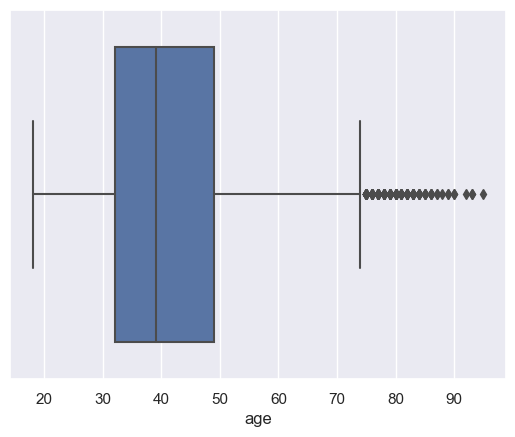

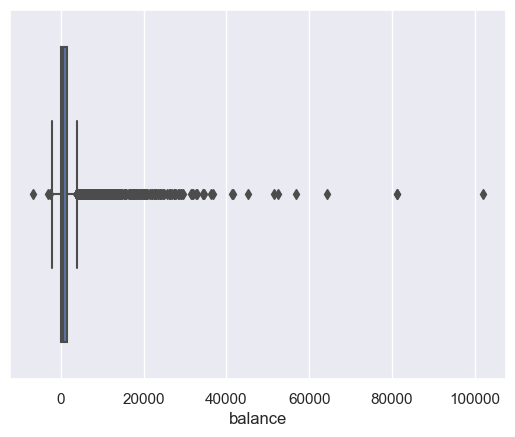

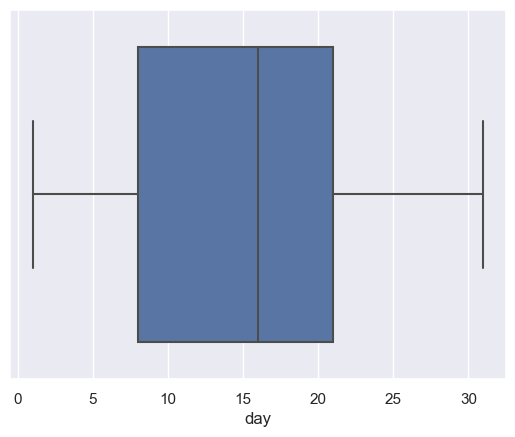

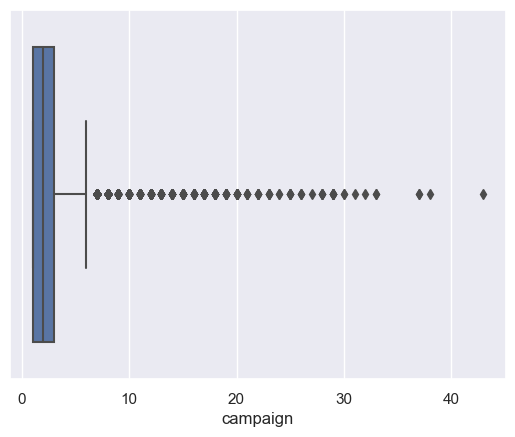

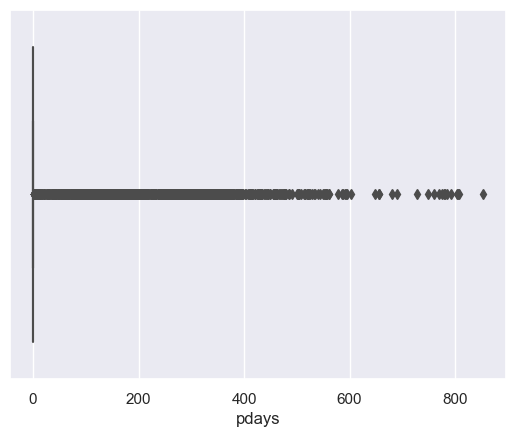

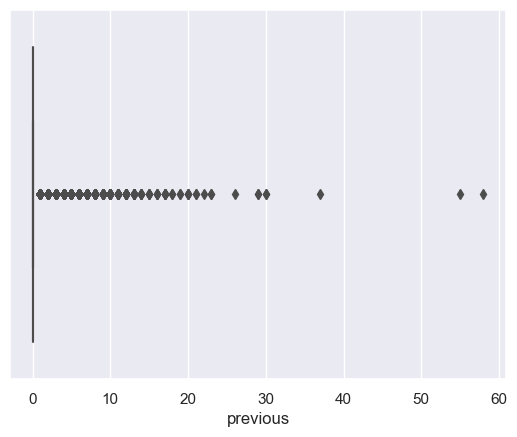

In [54]:
for i in variables.columns:
    sns.boxplot(data=variables,x=variables[i])
    plt.show()

In [55]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1

Lower = q1-1.5*IQR
Upper = q3+1.5*IQR

C:\Users\admin\AppData\Local\Temp\ipykernel_12268\3692840498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables[i] = np.where(variables[i] > Upper[i],Upper[i],variables[i])
C:\Users\admin\AppData\Local\Temp\ipykernel_12268\3692840498.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables[i] = np.where(variables[i] < Lower[i],Lower[i],variables[i])


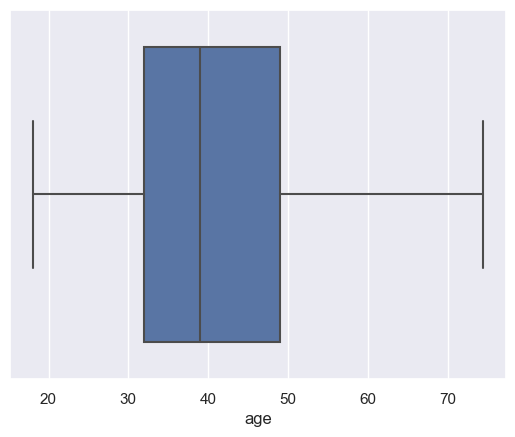

C:\Users\admin\AppData\Local\Temp\ipykernel_12268\3692840498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables[i] = np.where(variables[i] > Upper[i],Upper[i],variables[i])
C:\Users\admin\AppData\Local\Temp\ipykernel_12268\3692840498.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables[i] = np.where(variables[i] < Lower[i],Lower[i],variables[i])


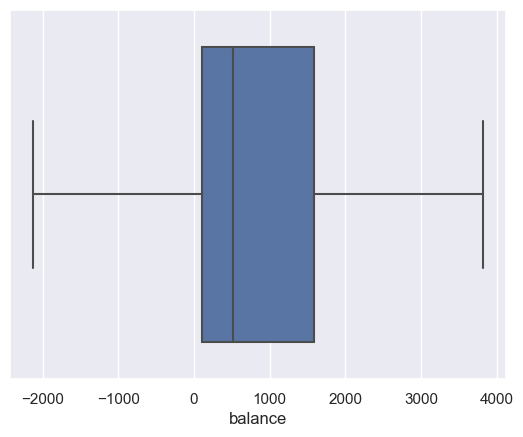

C:\Users\admin\AppData\Local\Temp\ipykernel_12268\3692840498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables[i] = np.where(variables[i] > Upper[i],Upper[i],variables[i])
C:\Users\admin\AppData\Local\Temp\ipykernel_12268\3692840498.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables[i] = np.where(variables[i] < Lower[i],Lower[i],variables[i])


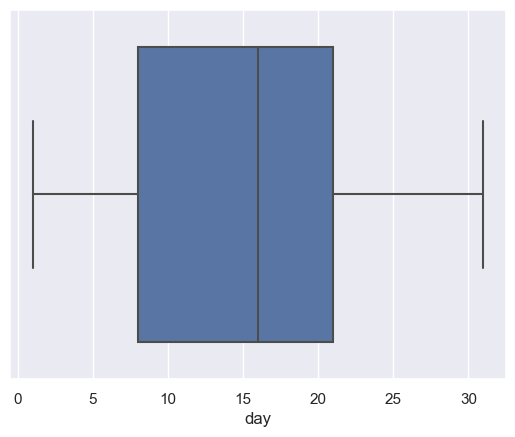

C:\Users\admin\AppData\Local\Temp\ipykernel_12268\3692840498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables[i] = np.where(variables[i] > Upper[i],Upper[i],variables[i])
C:\Users\admin\AppData\Local\Temp\ipykernel_12268\3692840498.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables[i] = np.where(variables[i] < Lower[i],Lower[i],variables[i])


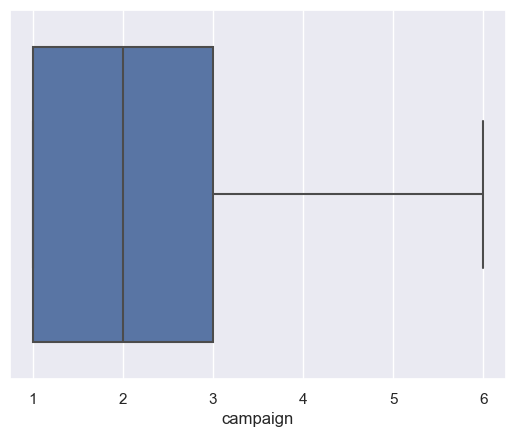

C:\Users\admin\AppData\Local\Temp\ipykernel_12268\3692840498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables[i] = np.where(variables[i] > Upper[i],Upper[i],variables[i])
C:\Users\admin\AppData\Local\Temp\ipykernel_12268\3692840498.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables[i] = np.where(variables[i] < Lower[i],Lower[i],variables[i])


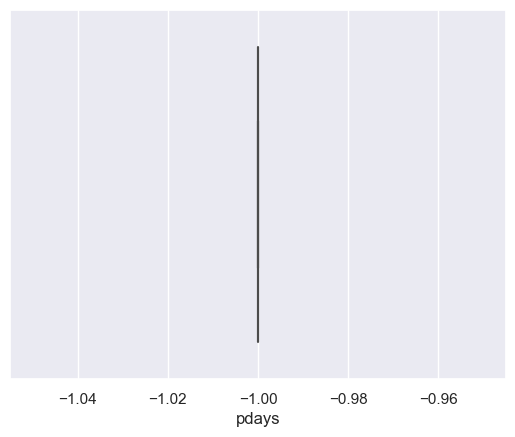

C:\Users\admin\AppData\Local\Temp\ipykernel_12268\3692840498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables[i] = np.where(variables[i] > Upper[i],Upper[i],variables[i])
C:\Users\admin\AppData\Local\Temp\ipykernel_12268\3692840498.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables[i] = np.where(variables[i] < Lower[i],Lower[i],variables[i])


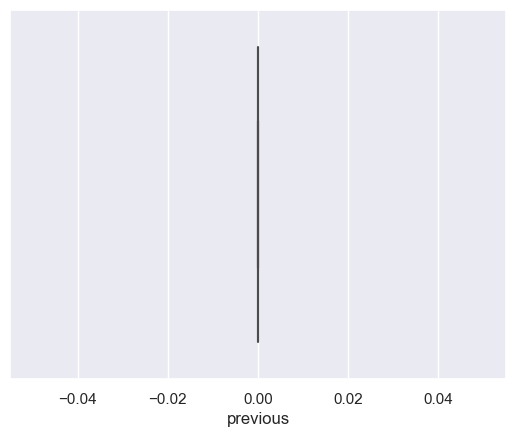

In [58]:
for i in variables.columns:
    variables[i] = np.where(variables[i] > Upper[i],Upper[i],variables[i])
    variables[i] = np.where(variables[i] < Lower[i],Lower[i],variables[i])
    sns.boxplot(data=variables,x=variables[i])
    plt.show()

In [59]:
data = pd.get_dummies(data, drop_first=True)

data

,age,balance,day,campaign,pdays,previous,result,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,response_other,response_success,response_unknown
0,29.0,18254.0,11.0,2.0,-1.0,0.0,1,0,1,0,1,0,0,0,0,0,0,0,0,1
1,26.0,512.0,5.0,3.0,-1.0,0.0,1,0,1,1,0,0,0,1,1,0,1,0,0,1
2,30.0,135.0,14.0,2.0,-1.0,0.0,1,0,1,1,0,0,0,0,0,0,0,0,0,1
3,41.0,30.0,10.0,1.0,-1.0,0.0,1,1,0,0,0,1,0,1,0,0,0,0,0,1
4,27.0,321.0,2.0,1.0,-1.0,0.0,1,0,1,1,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,47.0,1167.0,30.0,1.0,87.0,5.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
12866,31.0,111.0,21.0,2.0,93.0,2.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
12867,37.0,1316.0,18.0,1.0,172.0,2.0,1,0,1,0,1,0,0,1,0,0,0,0,0,0
12868,42.0,479.0,28.0,2.0,-1.0,0.0,1,1,0,0,1,0,0,1,0,0,1,0,0,1


In [60]:
data.columns

Index(['age', 'balance', 'day', 'campaign', 'pdays', 'previous', 'result',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'response_other',
       'response_success', 'response_unknown'],
      dtype='object')

In [63]:
X = data[['age', 'balance', 'day', 'campaign', 'pdays', 'previous',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'response_other',
       'response_success', 'response_unknown']]
y = data[['result']]

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    roc_pred = roc_auc_score(y_test, y_pred)
    roc_prob = roc_auc_score(y_test, y_prob)
    
    gini_pred = roc_pred*2-1
    gini_prob = roc_prob*2-1
    
    print('Model Performance')

    print('Gini pred is', gini_pred*100)
    print('Gini prob is', gini_prob*100)
    
    return gini_pred
    return gini_prob

In [69]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_auc_score

In [96]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [98]:
y_pred = dt.predict(X_test)

In [99]:
confusion_matrix(y_pred, y_test)

array([[ 556,  696],
       [ 608, 2001]], dtype=int64)

In [87]:
model = RandomForestClassifier(n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)
accuracy = evaluate(model, X_test, y_test)

C:\Users\admin\AppData\Local\Temp\ipykernel_12268\2135570747.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Model Performance
Gini pred is 32.872722268729284
Gini prob is 46.77282381977172


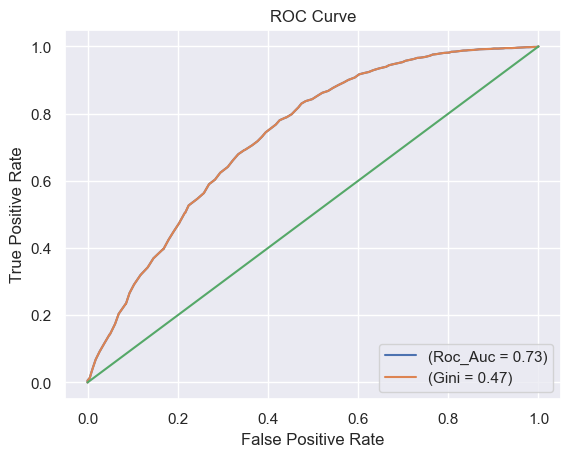

In [89]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

In [86]:
from sklearn.model_selection import RandomizedSearchCV

In [75]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [81]:
from random import randint

In [91]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [93]:
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=1, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=1)

In [100]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 60}

In [101]:
optimized_mod = rf_random.best_estimator_
optmized_acc = evaluate(optimized_mod, X_test, y_test)

Model Performance
Gini pred is 33.021130771494846
Gini prob is 50.27044176614719


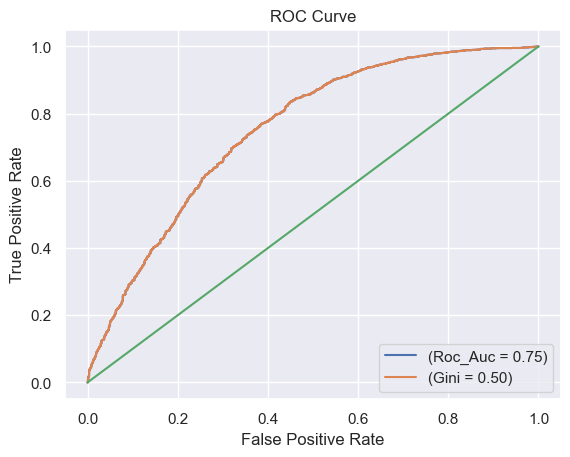

In [104]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = optimized_mod.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()